We consider the dataset found at  
http://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html

In [1]:
# import basic libraries
# using the nltk.corpus because the data is already
# formatted in an easy to use manner
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import reuters
from sklearn.feature_extraction import text
%matplotlib inline

In [14]:
# gather the complete data matrix
V = np.array([" ".join(list(reuters.words(file_id))).lower() for file_id in reuters.fileids()])
# use the tf-idf extraction method from the sklearn to get the tf-idf features from
# raw text
pretty = text.TfidfVectorizer()
# Learn vocabulary and idf, return term-document matrix.
V = pretty.fit_transform(V)

In [2]:
# define a simple cost function for the frobenius norm
def cost_function(V, W, H):
    """ general cost function 
    
    V - complete data matrix
    W - left hand side of matrix
    H - right hand side of matrix
    """
    cost = 0
    # return the coordinate matrix of some compelte data matrix
    modded = V.tocoo() 
    # add each row * column set
    for row, col, v in zip(modded.row, modded.col, modded.data):
         cost += np.square(v - np.inner(W[row], H[:,col]))
    return cost

In [30]:
def nonNegFac(V, r=20, iters=100, eps = 1e-4):
    """ Non-negative matrix factorization on complete data matrix.
    
    V - complete data matrix
    r - reduced parameter size of the matrix
    """
    
    # generate the smaller matrices from V by taking
    # random values, multiply to shrink the total size
    # and make convergence easier
    W = np.abs(np.random.randn(V.shape[0], r) * 1e-3)
    H = np.abs(np.random.randn(r, V.shape[1]) * 1e-3)
    
    # add the first cost function
    costs = [cost_function(V, W, H)]
    diff = costs[0]
    # iterate through given set of iters 
    # copy the paper's implementation 
    i = 0
    
    # use a tolerance, so we do not need to waste time
    while diff > eps and i < iters:
        if i % 2 == 0:
            print("Iteration:{} \t Cost:{}".format(i, costs[-1]))
        H = H*(W.T @ V) / ((W.T @ W) @ H)
        W = W*(V @ H.T) / (W @ (H @ H.T))
        
        #add the cost again
        costs.append(cost_function(V, W, H))
        diff = abs(costs[-1] - costs[-2])
        i += 1
            
    return W, H.T, costs

Iteration:0 	 Cost:10786.250057984986
Iteration:2 	 Cost:9486.053003639614
Iteration:4 	 Cost:9130.950790600067
Iteration:6 	 Cost:8913.648904409802
Iteration:8 	 Cost:8718.620031406228
Iteration:10 	 Cost:8551.758467759657
Iteration:12 	 Cost:8452.418590640167
Iteration:14 	 Cost:8393.880618189645
Iteration:16 	 Cost:8356.729768936428
Iteration:18 	 Cost:8331.919273449943
Iteration:20 	 Cost:8314.34577172232
Iteration:22 	 Cost:8300.832200053312
Iteration:24 	 Cost:8289.81726982232
Iteration:26 	 Cost:8280.538692202457
Iteration:28 	 Cost:8272.592262554463
Iteration:30 	 Cost:8265.665332787166
Iteration:32 	 Cost:8259.41728721685
Iteration:34 	 Cost:8253.684896561932
Iteration:36 	 Cost:8248.35080152182
Iteration:38 	 Cost:8243.290113759671
Iteration:40 	 Cost:8238.462794967138
Iteration:42 	 Cost:8233.911419235845
Iteration:44 	 Cost:8229.767442288523
Iteration:46 	 Cost:8226.100370432374
Iteration:48 	 Cost:8222.79740166472
Iteration:50 	 Cost:8219.758614754985
Iteration:52 	 Cost:8

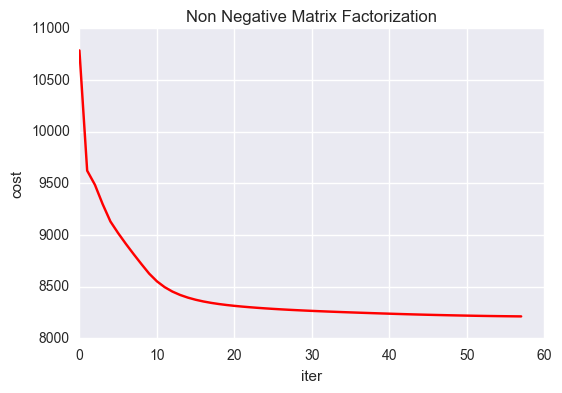

In [31]:
W, H, costs = nonNegFac(V, 20, 100)
plt.plot(costs, "r")
plt.title("Non Negative Matrix Factorization")
plt.xlabel("iter")
plt.ylabel("cost")

In [53]:
top = np.array(pretty.get_feature_names()) # turn the feature names into an array
# essentially we have a list of features now
top = top[np.argsort(H, axis=0)]# get by row
top = top[::-1]
for i in top[:20]:
    print(i)

['bank' 'oper' 'mln' 'tonnes' 'qtly' 'profit' 'vs' 'oil' 'loss' 'dlrs' 'to'
 'the' 'stg' '1987' '000' 'pct' 'billion' 'the' 'cts' 'march']
['fed' 'vs' 'vs' 'wheat' 'div' 'vs' 'net' 'crude' 'vs' 'mln' 'shares' 'of'
 'mln' 'mar' 'vs' 'in' 'surplus' 'to' 'qtr' 'franklin']
['rate' 'excludes' 'loss' 'sugar' 'cts' 'mln' 'shr' 'prices' 'cts'
 'quarter' 'it' 'said' 'money' 'apr' 'net' 'february' 'deficit' 'he' 'shr'
 'payout']
['pct' 'net' 'of' 'corn' 'record' 'net' 'revs' 'barrel' 'revs' 'share'
 'said' 'and' 'market' '20' 'includes' 'january' 'francs' 'that' '1st'
 'cts']
['dealers' 'dlrs' 'includes' 'for' 'april' 'revs' 'mln' 'opec' 'shr'
 'earnings' 'stock' 'in' 'bank' '26' 'avg' 'rose' 'marks' 'trade' 'net'
 'mthly']
['customer' 'discontinued' '1986' 'export' 'pay' 'shr' 'avg' 'to' '4th'
 'year' 'its' 'will' 'bills' 'feb' 'year' 'year' 'in' 'in' '4th' 'fund']
['money' 'or' 'year' 'to' 'prior' 'nine' 'shrs' 'gas' 'qtr' 'net' 'lt' 'it'
 'band' 'oct' 'sales' 'rise' 'reserves' 'said' 'inc' 'p